# Лабораторная работа №3
# Решение ДУЧП параболического типа

## 1. 1D уравнение теплопроводности

Необходимо решить уравнение теплопроводности 
$$\frac{\partial u}{\partial t} = a\frac{\partial^2 u}{\partial x^2} + f(x,t),$$ где
$$0\leq x\leq L, t\geq0, f(x, t) = x^3 - 6xt$$ с начальными $$u(x, 0) = 1$$ и граничными $$u(0, t) = 1, u'(1, t) = -2t$$ условиями.

### Аналитическое решение

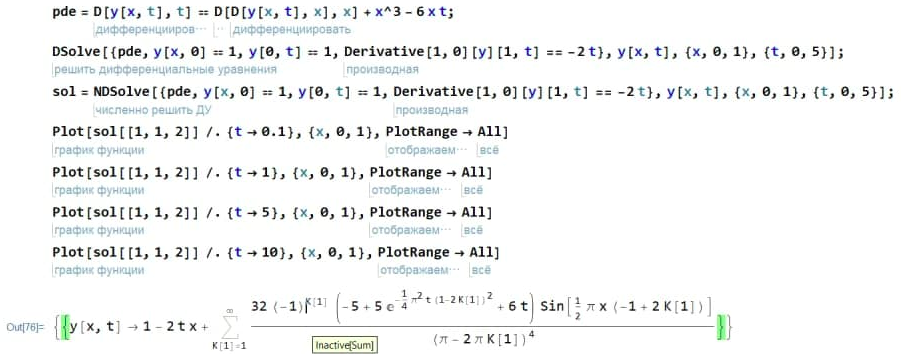

Значения температуры при временах 0.1, 1 и 5 сек

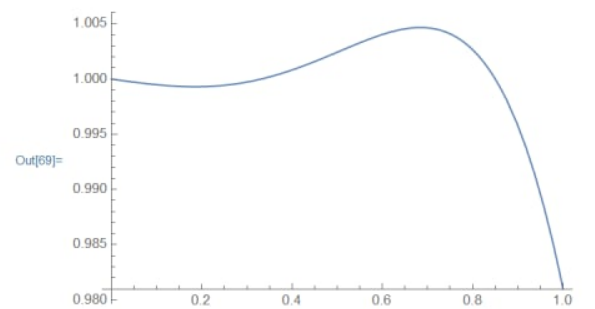

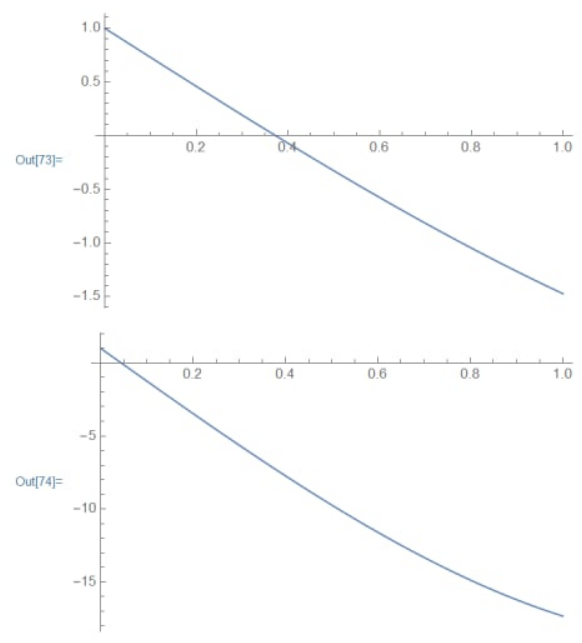

#### Необходимые библиотеки

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import math

In [9]:
a, length, time, columns = 1., 1., 10, 20


def f(x: float, t: float) -> float:
    return x**3 - 6 * x * t


def initial(x: float) -> float:
    return 1


def first_border(t: float) -> float:
    return 1


def second_border(t: float, prev_value: float, dx: float) -> float:
    return prev_value - 4 * dx * t


def func(t: float):
    return -2 * t


def sweep_method(u: list, a: float, c: float, b: float, lines: int, dt: float, dx: float) -> None:
    alpha = [0.] * columns
    beta = [0.] * columns

#### Функция отрисовки

In [10]:
def draw(dt: float, u: list) -> None:
    a, b = np.shape(u)
    x = np.linspace(0, length, b)
    fig = plt.figure()
    
    ax1 = fig.add_subplot(221)
    ax1.grid()
    plt.plot(x, u[int(0.1 / dt), :])

    ax2 = fig.add_subplot(222)
    ax2.grid()
    plt.plot(x, u[int(1 / dt), :])

    ax3 = fig.add_subplot(223)
    ax3.grid()
    plt.plot(x, u[int(5 / dt), :])

    ax4 = fig.add_subplot(224)
    ax4.grid()
    plt.plot(x, u[int(10 / dt), :])
    
    plt.show()

### 1.1 Явная двухслойная схема
$$\frac{u_{i}^{k + 1} - u_i^k}{\tau} = a^2 \frac{u_{i - 1}^{k} - 2u_{i}^{k} + u_{i + 1}^{k}}{h^2}$$ 

Введем постоянную, которая носит название число Куранта $\gamma = a^2\frac{\tau}{h^2}$ и перепишем формулу 



$$u_{i}^{k + 1} = \gamma u_{i - 1}^{k} + (1 - 2\gamma)u_{i}^{k} + \gamma u_{i + 1}^{k}$$

In [11]:
def explicity_method(d: float) -> list and float:
    dx = length / columns
    dt = dx**2 * d / a**2
    lines = int(time / dt)
    u = np.zeros((lines + 1, columns + 1), dtype=float)
    
    for i in range(1, columns):
        u[0][i] = initial(i * dx)
    
    for i in range(lines + 1):
        u[i][0] = first_border(i * dt)
        
    u[0][columns] = second_border(0, u[0][columns - 2], dx)
    for k in range(0, lines):
        for i in range(1, columns):
            u[k + 1][i] = d * u[k][i - 1] + (1 - 2 * d) * u[k][i] + d * u[k][i + 1] + dt * f(i * dx, k * dt)
        u[k + 1][columns] = second_border((k + 1) * dt, u[k + 1][columns - 2], dx)
    return u, dt

### ВНИМАНИЕ! 
Все графики в первой части лабораторной работы представлены при значениях времени 0.1, 1, 5 и 10 сек.

### Результат
Число Куранта $d = 0.1$

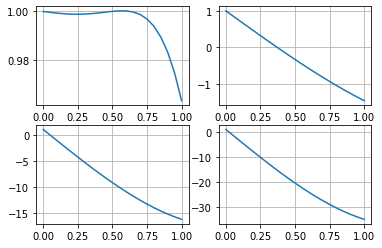

In [12]:
u, dt = explicity_method(d=0.1)
draw(dt, u)

Число Куранта $d = 0.5$

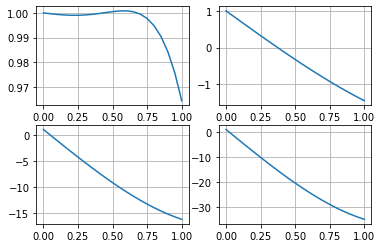

In [13]:
u, dt = explicity_method(d=0.5)
draw(dt, u)

Число Куранта $d = 0.6$

<ipython-input-11-289bfecc4442>:16: RuntimeWarning: overflow encountered in double_scalars
  u[k + 1][i] = d * u[k][i - 1] + (1 - 2 * d) * u[k][i] + d * u[k][i + 1] + dt * f(i * dx, k * dt)


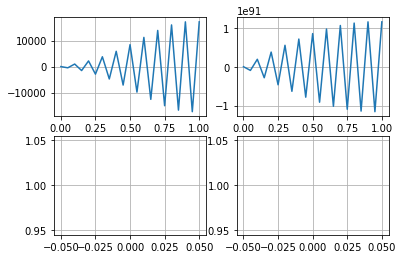

In [14]:
u, dt = explicity_method(d=0.6)
draw(dt, u)

Число Куранта $d = 2.5$

<ipython-input-11-289bfecc4442>:16: RuntimeWarning: overflow encountered in double_scalars
  u[k + 1][i] = d * u[k][i - 1] + (1 - 2 * d) * u[k][i] + d * u[k][i + 1] + dt * f(i * dx, k * dt)


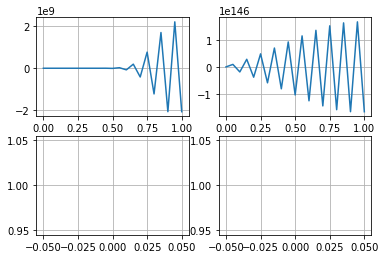

In [15]:
u, dt = explicity_method(d=2.5)
draw(dt, u)

### 1.2 Неявная двухслойная схема
$$\frac{u_{i}^{k} - u_i^{k - 1}}{\tau} = a^2 \frac{u_{i - 1}^{k} - 2u_{i}^{k} + u_{i + 1}^{k}}{h^2}$$ 

$$-u_{i}^{k - 1} = \gamma u_{i - 1}^{k} - (1 + 2\gamma)u_{i}^{k} + \gamma u_{i + 1}^{k}$$

In [16]:
def implicity_method(d: float) -> list and float:
    dx = length / columns
    dt = dx**2 * d / a**2
    lines = int(time / dt)
    u = np.zeros((lines + 1, columns + 1), dtype=float)
    
    for i in range(1, columns):
        u[0][i] = initial(i * dx)
        


    return u, dt

### Результат

### 1.3 Схема Ричардсона
$$\frac{u_{i}^{k} - u_i^{k - 1}}{2\tau} = a^2 \frac{u_{i - 1}^{k} - 2u_{i}^{k} + u_{i + 1}^{k}}{h^2}$$ 

$$-u_{i}^{k - 1} = \gamma u_{i - 1}^{k} - (1 + 2\gamma)u_{i}^{k} + \gamma u_{i + 1}^{k}$$

In [17]:
def richardson(d: float) -> list and float:
    dx = length / columns
    dt = dx**2 * d / a**2
    lines = int(time / dt)
    u = np.zeros((lines + 1, columns + 1), dtype=float)
    
    for i in range(1, columns):
        u[0][i] = initial(i * dx)
    
    for i in range(lines + 1):
        u[i][0] = first_border(i * dt)
    
    u[0][columns] = second_border(0, u[0][columns - 2], dx)
    for i in range(1, columns):
        u[1][i] = d * u[0][i - 1] + (1 - 2 * d) * u[0][i] + d * u[0][i + 1] + dt * f(i * dx, 0)
    
    u[1][columns] = second_border(dt, u[1][columns - 2], dx)
    for k in range(1, lines):
        for i in range(1, columns):
            u[k+1][i] = u[k-1][i]+2*d*u[k][i-1]-4*d*u[k][i]+2*d*u[k][i+1]+2*dt*f(i*dx, k*dt)
        u[k + 1][columns] = second_border((k + 1) * dt, u[k + 1][columns - 2], dx)
    return u, dt

### Результат
Число Куранта $d = 0.1$

<ipython-input-17-e4fd8b5bf0ec>:20: RuntimeWarning: overflow encountered in double_scalars
  u[k+1][i] = u[k-1][i]+2*d*u[k][i-1]-4*d*u[k][i]+2*d*u[k][i+1]+2*dt*f(i*dx, k*dt)


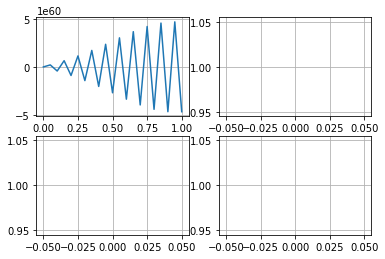

In [18]:
u, dt = richardson(d=0.1)
draw(dt, u)

Число Куранта $d = 0.5$

<ipython-input-17-e4fd8b5bf0ec>:20: RuntimeWarning: overflow encountered in double_scalars
  u[k+1][i] = u[k-1][i]+2*d*u[k][i-1]-4*d*u[k][i]+2*d*u[k][i+1]+2*dt*f(i*dx, k*dt)


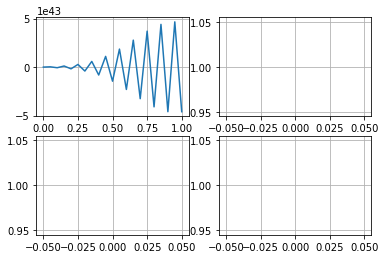

In [19]:
u, dt = richardson(d=0.5)
draw(dt, u)

Число Куранта $d = 0.6$

<ipython-input-17-e4fd8b5bf0ec>:20: RuntimeWarning: overflow encountered in double_scalars
  u[k+1][i] = u[k-1][i]+2*d*u[k][i-1]-4*d*u[k][i]+2*d*u[k][i+1]+2*dt*f(i*dx, k*dt)


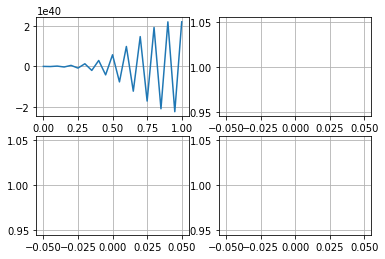

In [20]:
u, dt = richardson(d=0.6)
draw(dt, u)

Число Куранта $d = 2.5$

<ipython-input-17-e4fd8b5bf0ec>:20: RuntimeWarning: overflow encountered in double_scalars
  u[k+1][i] = u[k-1][i]+2*d*u[k][i-1]-4*d*u[k][i]+2*d*u[k][i+1]+2*dt*f(i*dx, k*dt)


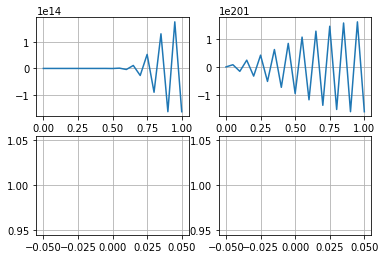

In [21]:
u, dt = richardson(d=2.5)
draw(dt, u)

### 1.4 Схема Дюфорта и Франкеля

$$\frac{u_{i}^{k + 1} - u_i^{k - 1}}{2\tau} = a^2 \frac{u_{i + 1}^{k} - u_{i}^{k + 1} - u_{i}^{k - 1} + u_{i - 1}^{k}}{h^2}$$ 

$$u_i^{k + 1} = u_i^{k - 1} + 2\gamma u_{i - 1}^k - 4\gamma u_i^k + 2\gamma u_{i + 1}^k$$

In [22]:
def dufort_frankel(d: float) -> list and float:
    dx = length / columns
    dt = dx**2 * d / a**2
    lines = int(time / dt)
    u = np.zeros((lines + 1, columns + 1), dtype=float)
    
    tmp1 = 1 + 2 * d
    tmp2 = 1 - 2 * d
    
    for i in range(1, columns):
        u[0][i] = initial(i * dx)
    
    for i in range(lines + 1):
        u[i][0] = first_border(i * dt)
        
    u[0][columns] = second_border(0, u[0][columns - 2], dx)
    for i in range(1, columns):
        u[1][i] = d * u[0][i - 1] + (1 - 2 * d) * u[0][i] + d * u[0][i + 1] + dt * f(i * dx, 0)
    
    u[1][columns] = second_border(dt, u[1][columns - 2], dx)
    for k in range(1, lines):
        for i in range(1, columns):
            u[k+1][i] = (2*d*(u[k][i+1]+u[k][i-1])+tmp2*u[k-1][i]+2*dt*f(i*dx, k*dt))/tmp1
        u[k + 1][columns] = second_border((k + 1) * dt, u[k + 1][columns - 2], dx)
    return u, dt

### Результат
Число Куранта $d = 0.1$

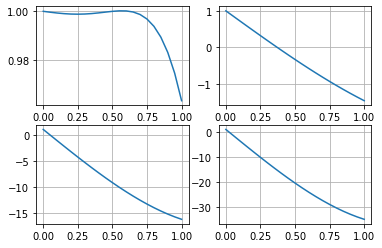

In [23]:
u, dt = dufort_frankel(d=0.1)
draw(dt, u)

Число Куранта $d = 0.5$

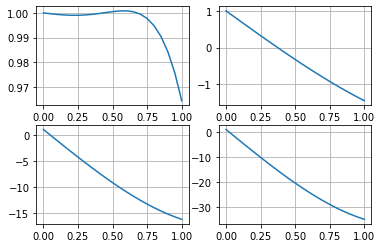

In [24]:
u, dt = dufort_frankel(d=0.5)
draw(dt, u)

Число Куранта $d = 0.6$

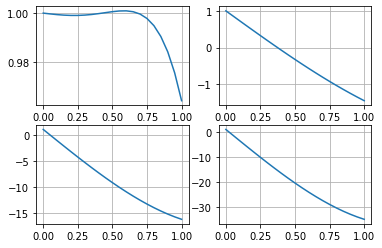

In [25]:
u, dt = dufort_frankel(d=0.6)
draw(dt, u)

Число Куранта $d = 2.5$

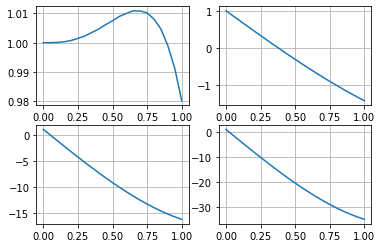

In [26]:
u, dt = dufort_frankel(d=2.5)
draw(dt, u)

### 1.5 Схема Кранка-Николсон

$$\frac{u_{i}^{k + 1} - u_i^{k}}{\tau} = a^2 \frac{u_{i - 1}^{k + 1} - 2u_{i}^{k + 1} + u_{i + 1}^{k + 1}}{h^2}$$ 

$$\gamma u_{i - 1}^{k + 1} - (2 + 2\gamma)u_{i}^{k + 1} + \gamma u_{i + 1}^{k + 1} = G_k^i, $$где 
$$G_k^i = -\gamma u_{i - 1}^{k} - (2 - 2\gamma)u_{i}^{k} - \gamma u_{i + 1}^{k}$$

### Результат
Число Куранта $d = 0.1$

Число Куранта $d = 0.5$

Число Куранта $d = 0.6$

Число Куранта $d = 2.5$

## 2. 2D уравнение теплопроводности
Необходимо решить уравнение теплопроводности 
$$\frac{\partial u}{\partial t} = a \left(\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2}\right),$$ где
$$0\leq x\leq L, 0\leq y\leq L, t\geq0$$ с начальными $$u(x, y, 0)= 1$$ и граничными $$u_x(0, t) = 0, u_x(1, t) = 1$$ $$u_y(0, t) = 0, u_y(1, t) = 1$$ условиями.

In [27]:
a, length, time, columns = 1., 1., 1, 20


def initial_2d(x: float, y: float):
    return math.sin(3.141592 * x) * math.sin(3.141592 * y)


def first_border_x(y: float, t: float):
    return 0


def second_border_x(y: float, t: float):
    return 0


def first_border_y(x: float, t: float):
    return 0


def second_border_y(x: float, t: float):
    return 0

#### Функия отрисовки

In [28]:
def draw(dt: float, u: list, tmp: float) -> None:
    a, b, c = np.shape(u)
    x = np.linspace(0, length, b)
    y = np.linspace(0, length, c)
    X, Y = np.meshgrid(x, y)
    fig= plt.figure()
    
    ax = fig.gca(projection='3d')
    ax.set_zlim(0, 0.5)
    surf = ax.plot_surface(X, Y, u[int(tmp / dt), :], cmap=cm.coolwarm, linewidth=0, antialiased=False)
    
    plt.show()

### 2.1 Явная схема

In [29]:
def explicity_2d(d: float) -> list and float:
    dx = length / columns
    dy = dx
    dt = dx**2 * d / a**2
    lines = int(time / dt)
    u = np.zeros((lines + 1, columns + 1, columns + 1), dtype=float)
    
    for i in range(1, columns):
        for j in range(1, columns):
            u[0][i][j] = initial_2d(i * dx, j * dy)
    
    for i in range(lines + 1):
        for j in range(columns + 1):
            u[i][0][j] = first_border_y(j * dx, i * dt)
            u[i][columns][j] = second_border_y(j * dx, i * dt)
            
        for j in range(columns + 1):
            u[i][j][0] = first_border_x(j * dx, i * dt)
            u[i][j][columns] = second_border_x(j * dx, i * dt)
            
    for i in range(lines):
        for j in range(1, columns):
            for k in range(1, columns):
                u[i+1][j][k]=d*(
                    (u[i][j+1][k]-2*u[i][j][k]+u[i][j-1][k])+(u[i][j][k+1]-2*u[i][j][k]+u[i][j][k-1])
                )+u[i][j][k]
    return u, dt

### Результат
Значения температуры при $t = \left\{ 0, 0.01, 0.05, 0.1, 0.2, 1\right\}$ и $d = 0.1$

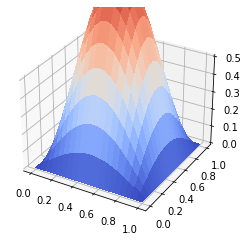

In [30]:
u, dt = explicity_2d(d=0.1)
draw(dt, u, tmp=0)

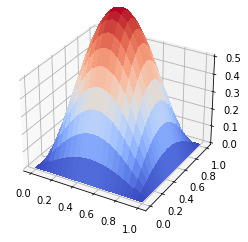

In [31]:
u, dt = explicity_2d(d=0.1)
draw(dt, u, tmp=0.01)

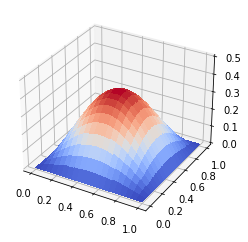

In [32]:
u, dt = explicity_2d(d=0.1)
draw(dt, u, tmp=0.05)

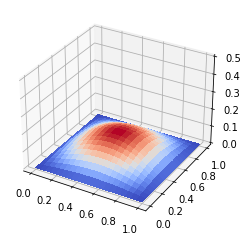

In [33]:
u, dt = explicity_2d(d=0.1)
draw(dt, u, tmp=0.1)

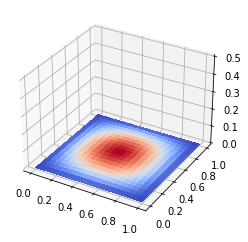

In [34]:
u, dt = explicity_2d(d=0.1)
draw(dt, u, tmp=0.2)

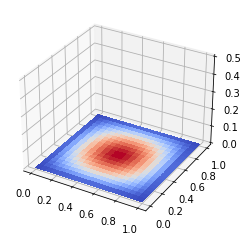

In [35]:
u, dt = explicity_2d(d=0.1)
draw(dt, u, tmp=1)

## 3. 1D уравнения конвекции-диффузии
Необходимо решить уравнение теплопроводности 
$$\frac{\partial T}{\partial t} + u\frac{\partial T}{\partial x} = a \frac{\partial^2 T}{\partial x^2},$$ где
$$0\leq x\leq L, 0\leq y\leq L, t\geq0$$ с начальными $$u(x, 0)= \frac{100x}{L}$$ и граничными $$u(0, t) = 0, u(L, t) = 100$$ условиями.


In [64]:
a, u, length, time, columns = 1, 1, 1., 1, 20


def initial_1d(x: float) -> float:
    return 100 * x / length


def first_border_1d(t: float) -> int:
    return 0


def second_border_1d(t: float) -> int:
    return 100


def sweep_method_1d(T: list, c: float, d: float, lines: int) -> None:
    A = -(c / 2 + d)
    B = 1 + 2 * d
    C = (c / 2 - d)
    
    alpha = [0.] * columns
    beta = [0.] * columns

    for i in range(1, lines + 1):
        alpha[0] = 0.
        beta[0] = T[i - 1][0]

        for j in range(1, columns):
            alpha[j] = -C / (B + A * alpha[j - 1])
            beta[j] = (T[i - 1][j] - A * beta[j - 1]) / (B + A * alpha[j - 1])

        for j in reversed(range(1, columns)):
            T[i][j] = alpha[j] * T[i][j + 1] + beta[j]

#### Функции отрисовки

In [45]:
def draw1(dt: float, T: list) -> None:
    a, b = np.shape(T)
    x = np.linspace(0, length, b)
    fig = plt.figure()
    
    ax1 = fig.add_subplot(221)
    ax1.grid()
    plt.plot(x, T[int(0 / dt), :])

    ax2 = fig.add_subplot(222)
    ax2.grid()
    plt.plot(x, T[int(0.01 / dt), :])

    ax3 = fig.add_subplot(223)
    ax3.grid()
    plt.plot(x, T[int(0.025 / dt), :])

    ax4 = fig.add_subplot(224)
    ax4.grid()
    plt.plot(x, T[int(0.05 / dt), :])

    plt.show()
    
    
def draw2(dt: float, T: list) -> None:
    a, b = np.shape(T)
    x = np.linspace(0, length, b)
    fig = plt.figure()
    
    ax1 = fig.add_subplot(221)
    ax1.grid()
    plt.plot(x, T[int(0.1 / dt), :])
    
    ax2 = fig.add_subplot(222)
    ax2.grid()
    plt.plot(x, T[int(0.2 / dt), :])
    
    ax3 = fig.add_subplot(223)
    ax3.grid()
    plt.plot(x, T[int(0.5 / dt), :])
    
    ax4 = fig.add_subplot(224)
    ax4.grid()
    plt.plot(x, T[int(1 / dt), :])
    
    plt.show()

### 3.1 Явный метод

In [61]:
def explicity_1d(d: float) -> list and float:
    dx = length / columns
    dt = dx**2 * d / a**2
    c = dx * u / 2
    lines = int(time / dt)
    T = np.zeros((lines + 1, columns + 1), dtype=float)
    
    for i in range(1, columns):
        T[0][i] = initial(i * dx)
    
    for i in range(lines + 1):
        T[i][0] = first_border_1d(i * dt)
        T[i][columns] = second_border_1d(i * dt)
        
    for k in range(lines):
        for i in range(1, columns):
            T[k+1][i]=T[k][i]-c*(T[k][i+1]-T[k][i-1])/2+d*(T[k][i+1]+T[k][i-1]-2*T[k][i])
    return T, dt

### Результат
$d = 0.5$ и $t = 0, 0.01, 0.025, 0.05$

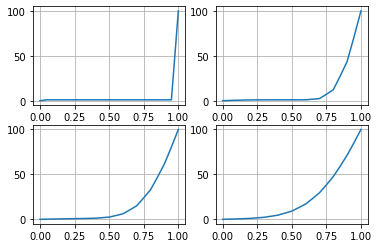

In [62]:
T, dt = explicity_1d(d=0.5)
draw1(dt, T)

$d = 0.5$ и $t = 0.1, 0.2, 0.5, 1$

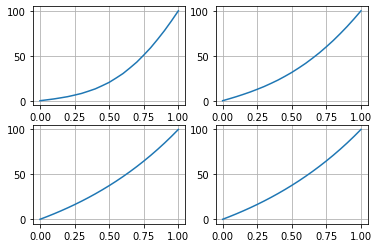

In [63]:
draw2(dt, T)

### 3.2 Неявный метод

In [65]:
def implicity_1d(d: float) -> list and float:
    dx = length / columns
    dt = dx**2 * d / a**2
    c = dx * u / 2
    lines = int(time / dt)
    T = np.zeros((lines + 1, columns + 1), dtype=float)
    
    for i in range(1, columns):
        T[0][i] = initial(i * dx)
    
    for i in range(lines + 1):
        T[i][0] = first_border_1d(i * dt)
        T[i][columns] = second_border_1d(i * dt)
        
    sweep_method_1d(T, c, d, lines)
    return T, dt

### Результат
$d = 0.5$ и $t = 0, 0.01, 0.025, 0.05$

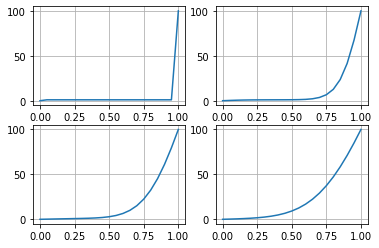

In [66]:
T, dt = implicity_1d(d=0.5)
draw1(dt, T)

$d = 0.5$ и $t = 0.1, 0.2, 0.5, 1$

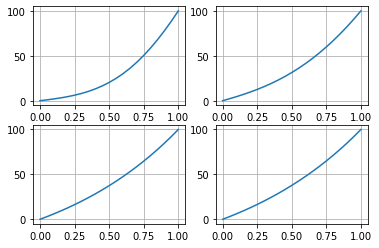

In [67]:
draw2(dt, T)